## EDA

In [1]:
# 02_exploratory_analysis.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Caricamento del dataset pre-elaborato ===
df = pd.read_csv("../data/df_fallrisk_clean.csv")
print("✅ Dataset caricato con shape:", df.shape)
df.head()

✅ Dataset caricato con shape: (71, 48)


,hr_v,hr_ml,hr_ap,%det_v,%det_ml,%det_ap,sex_m1_f2,age,heigth,weigth,...,falls_last_year_1si_2no_code,stipsi_1si_2no_code,iposmia_1si_2no_code,disturbo_sonno_rem_1si_2no_code,depressione_1si_2no_code,total_falls,falls_month_rate,falls_year_rate,fallers_1_nonfaller_0,recurrent_fallers1_nonfallers_occasional0
0,1.771,2.019,1.315,85.784,85.116,94.241,1.0,72.0,178.0,67.0,...,0,0,0,2,0,31,1.476190,17.714286,1,1
1,1.861,1.266,1.251,79.624,75.276,73.553,1.0,50.0,176.0,85.0,...,2,2,2,2,2,5,0.185185,2.222222,1,0
2,2.838,1.193,2.566,83.432,85.353,88.865,2.0,74.0,164.0,60.0,...,2,0,2,2,2,7,0.225806,2.709677,1,0
3,3.253,1.831,2.659,81.009,65.618,66.567,1.0,62.0,166.0,76.0,...,2,2,0,2,2,0,0.000000,0.000000,0,0
4,1.804,2.819,1.616,67.134,75.819,65.493,1.0,77.0,170.0,86.0,...,0,0,0,0,2,4,0.307692,3.692308,1,1


In [2]:
# Statistiche descrittive delle variabili numeriche
desc_stats = df.describe().T
desc_stats["missing (%)"] = df.isnull().mean() * 100
desc_stats

,count,mean,std,min,25%,50%,75%,max,missing (%)
hr_v,71.0,2.082333,0.537192,1.106547,1.760158,1.997000,2.335500,3.405000,0.0
hr_ml,71.0,1.819602,0.390858,1.072863,1.492500,1.817221,2.023000,2.819000,0.0
hr_ap,71.0,2.046662,0.543157,0.939274,1.598500,2.108000,2.495500,3.555000,0.0
%det_v,71.0,64.558296,23.653970,8.272000,46.010500,70.179000,82.220500,97.714064,0.0
%det_ml,71.0,61.201305,27.426320,4.526000,48.182500,68.993000,83.273457,98.522795,0.0
%det_ap,71.0,59.555879,28.235656,5.786000,41.731500,66.684000,85.926000,98.431143,0.0
sex_m1_f2,71.0,1.289855,0.450443,1.000000,1.000000,1.000000,2.000000,2.000000,0.0
age,71.0,71.362319,7.744069,47.000000,68.000000,72.000000,76.500000,86.000000,0.0
heigth,71.0,168.405797,8.073446,150.000000,162.500000,170.000000,172.500000,191.000000,0.0
weigth,71.0,74.159420,12.092055,32.000000,67.500000,74.159420,81.000000,104.000000,0.0


In [3]:
# 📁 Crea la cartella se non esiste
import os
os.makedirs("../results/tables", exist_ok=True)

# 💾 Esporta in CSV
desc_stats.to_csv("../results/tables/statistiche_descrittive_numeriche.csv")

# 💾 Esporta in Excel (opzionale)
desc_stats.to_excel("../results/tables/statistiche_descrittive_numeriche.xlsx")

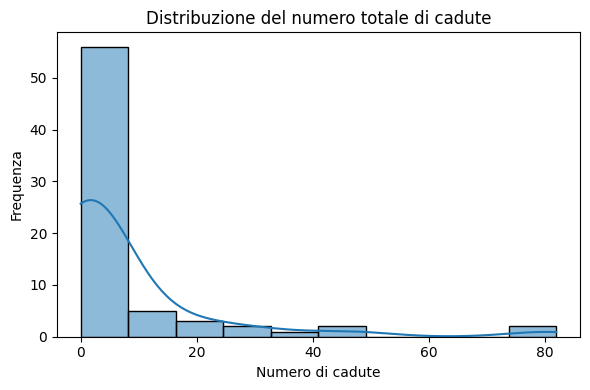

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_falls'], bins=10, kde=True)
plt.title("Distribuzione del numero totale di cadute")
plt.xlabel("Numero di cadute")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.savefig("../results/figures/distribuzione_total_falls.png", dpi=300)
plt.show()

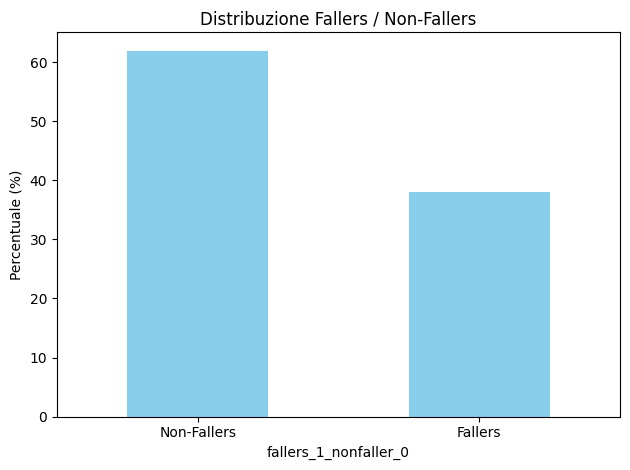

In [5]:
fallers_rate = df['fallers_1_nonfaller_0'].value_counts(normalize=True) * 100
fallers_rate.plot(kind='bar', color='skyblue')
plt.title("Distribuzione Fallers / Non-Fallers")
plt.ylabel("Percentuale (%)")
plt.xticks(ticks=[0,1], labels=["Non-Fallers", "Fallers"], rotation=0)
plt.tight_layout()
plt.savefig("../results/figures/distribuzione_fallers.png", dpi=300)
plt.show()

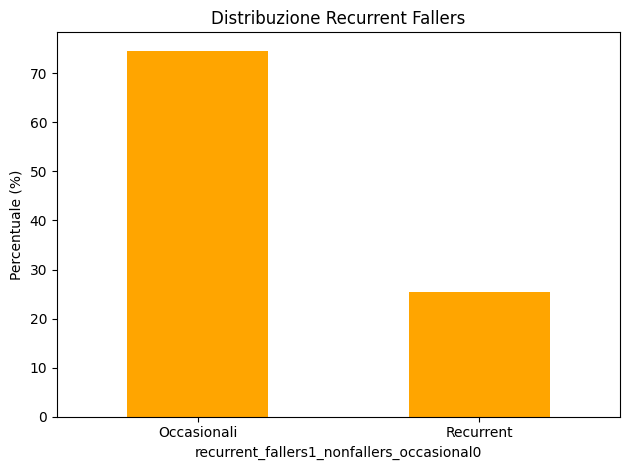

In [6]:
rec_rate = df['recurrent_fallers1_nonfallers_occasional0'].value_counts(normalize=True) * 100
rec_rate.plot(kind='bar', color='orange')
plt.title("Distribuzione Recurrent Fallers")
plt.ylabel("Percentuale (%)")
plt.xticks(ticks=[0,1], labels=["Occasionali", "Recurrent"], rotation=0)
plt.tight_layout()
plt.savefig("../results/figures/distribuzione_recurrent_fallers.png", dpi=300)
plt.show()

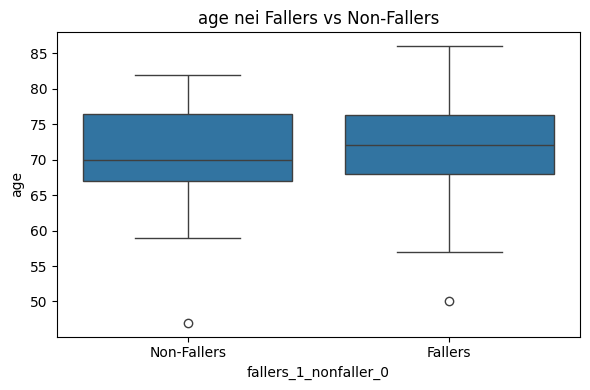

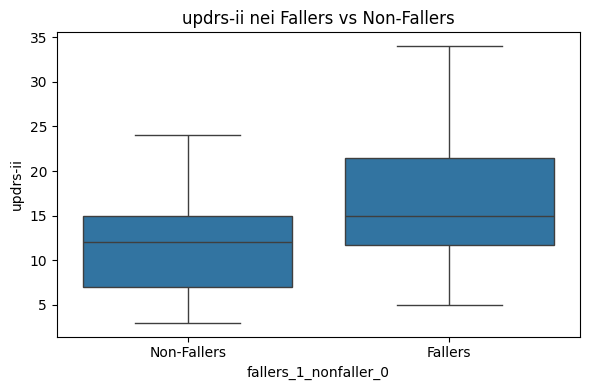

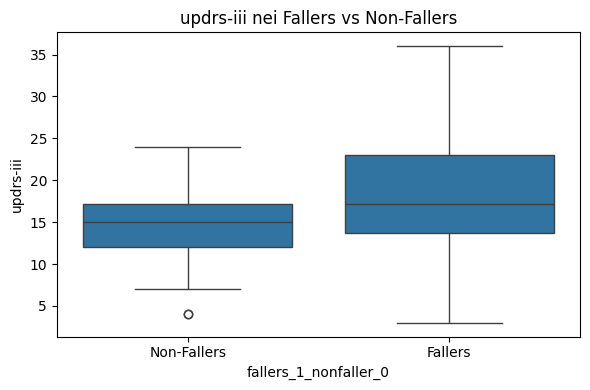

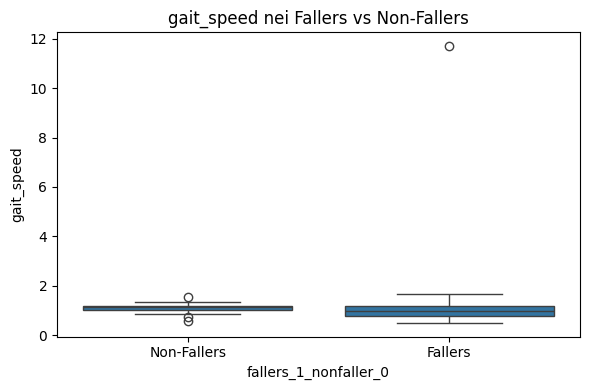

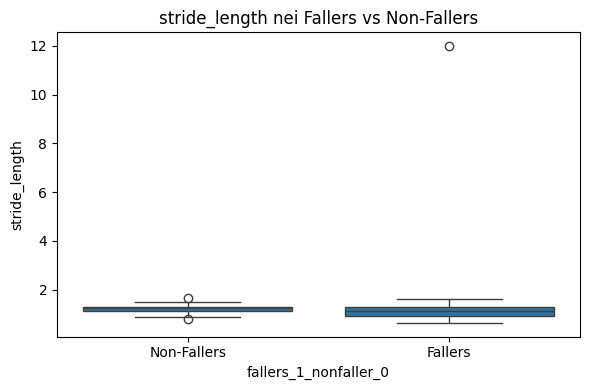

In [7]:
vars_confronto = ['age', 'updrs-ii', 'updrs-iii', 'gait_speed', 'stride_length']

for var in vars_confronto:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='fallers_1_nonfaller_0', y=var, data=df)
    plt.title(f"{var} nei Fallers vs Non-Fallers")
    plt.xticks(ticks=[0,1], labels=["Non-Fallers", "Fallers"])
    plt.tight_layout()
    plt.savefig(f"../results/figures/boxplot_{var}_fallers.png", dpi=300)
    plt.show()

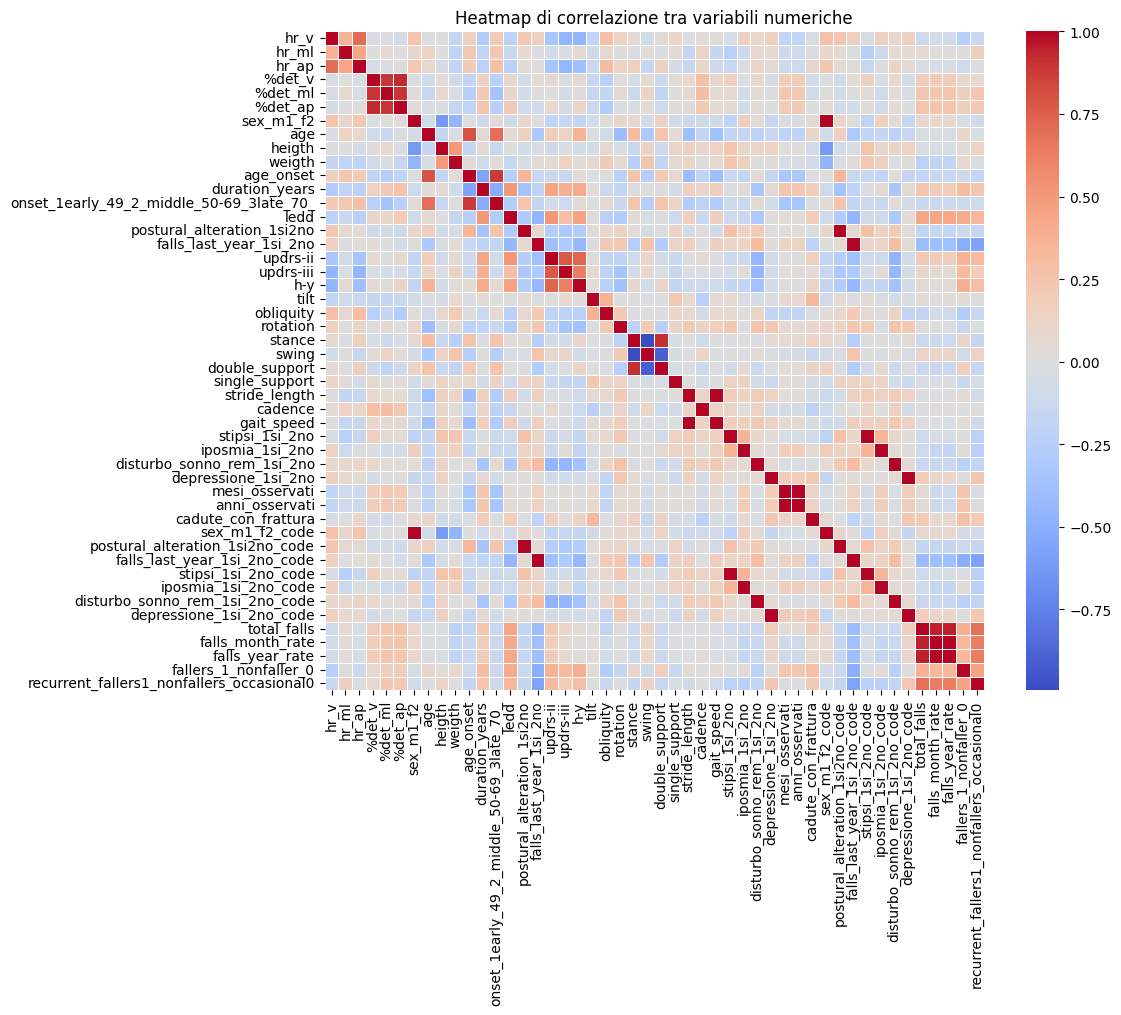

In [10]:
# 🔗 Calcolo della matrice di correlazione numerica
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# 🔥 Heatmap delle correlazioni
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Heatmap di correlazione tra variabili numeriche")
plt.tight_layout()
plt.savefig("../results/figures/heatmap_correlazioni.png", dpi=300)
plt.show()

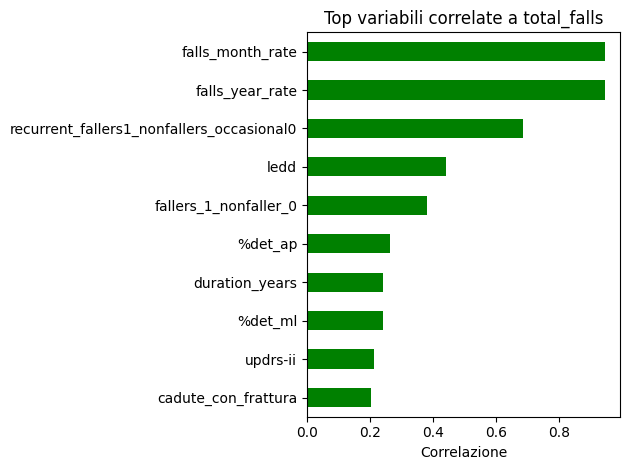

In [11]:
# 🔁 Assicurati che la matrice di correlazione sia calcolata
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# 📊 Correlazioni con total_falls (escluse autocorrelazioni)
fall_corr = corr['total_falls'].drop('total_falls').sort_values(ascending=False)

# 📈 Plot top 10
fall_corr.head(10).plot(kind='barh', color='green')
plt.title("Top variabili correlate a total_falls")
plt.xlabel("Correlazione")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../results/figures/top_correlate_total_falls.png", dpi=300)
plt.show()

In [12]:
fall_corr.to_csv("../results/tables/correlazioni_total_falls.csv")

In [13]:
corr.to_csv("../results/tables/correlazioni_completa.csv")